In [1]:
import os
import time
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
water_data=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/범일/waterData.xlsx")

In [3]:
water_data.head()

,house,2023-06-01 00:00:00,2023-06-01 06:00:00,2023-06-01 12:00:00,2023-06-01 18:00:00,2023-06-02 00:00:00,2023-06-02 06:00:00,2023-06-02 12:00:00,2023-06-02 18:00:00,2023-06-03 00:00:00,...,2023-08-29 12:00:00,2023-08-29 18:00:00,2023-08-30 00:00:00,2023-08-30 06:00:00,2023-08-30 12:00:00,2023-08-30 18:00:00,2023-08-31 00:00:00,2023-08-31 06:00:00,2023-08-31 12:00:00,2023-08-31 18:00:00
0,1호,30,120,210,410,32,184,180,260,35,...,190,230,98,143,253,198,78,159,169,147
1,2호,58,218,290,105,10,68,38,263,78,...,214,247,53,160,210,150,39,120,147,110
2,3호,28,184,150,38,62,151,140,145,78,...,210,150,69,169,251,169,47,157,230,169
3,4호,14,169,89,55,55,130,135,138,28,...,180,260,14,145,203,216,55,136,189,84
4,5호,47,260,58,169,110,198,89,121,14,...,180,260,14,145,203,216,55,136,189,84


In [4]:
water_house=water_data['house']

In [5]:
water_data.drop(['house'],axis=1,inplace=True)

In [6]:
water_data_tr=water_data.transpose()

In [7]:
water_max=water_data_tr.abs().max()

In [8]:
water_max

,0
0,410
1,410
2,453
3,453
4,453
...,...
995,410
996,410
997,410
998,410


In [9]:
water_data_tr= water_data_tr/water_max

In [10]:
water_data_tr

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-06-01 00:00:00,0.073171,0.141463,0.061810,0.030905,0.103753,0.085366,0.172185,0.099338,0.105960,0.103753,...,0.472406,0.403974,0.239024,0.085366,0.141463,0.458537,0.458537,0.531707,0.104878,0.022075
2023-06-01 06:00:00,0.292683,0.531707,0.406181,0.373068,0.573951,0.482927,0.695364,0.657837,0.353201,0.269316,...,0.545254,0.419426,0.348780,0.353659,0.531707,0.231707,0.231707,0.853659,0.331707,0.150110
2023-06-01 12:00:00,0.512195,0.707317,0.331126,0.196468,0.128035,0.134146,0.401766,0.419426,0.463576,0.481236,...,0.116998,0.304636,0.617073,0.495122,0.707317,0.112195,0.112195,0.092683,0.460976,0.083885
2023-06-01 18:00:00,1.000000,0.256098,0.083885,0.121413,0.373068,0.707317,0.309051,0.112583,0.331126,0.772627,...,0.353201,0.309051,0.482927,0.526829,0.256098,0.339024,0.339024,0.446341,0.204878,0.580574
2023-06-02 00:00:00,0.078049,0.024390,0.136865,0.121413,0.242826,0.190244,0.099338,0.150110,0.152318,0.083885,...,0.463576,0.000000,0.190244,0.104878,0.024390,0.521951,0.521951,0.463415,0.131707,0.172185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 18:00:00,0.482927,0.365854,0.373068,0.476821,0.476821,0.268293,0.772627,0.373068,0.320088,0.324503,...,0.150110,0.242826,0.587805,0.526829,0.343902,0.297561,0.353659,0.390244,0.390244,0.348786
2023-08-31 00:00:00,0.190244,0.095122,0.103753,0.121413,0.121413,0.212195,0.083885,0.103753,0.150110,0.128035,...,0.311258,0.070640,0.117073,0.104878,0.458537,0.531707,0.495122,0.512195,0.482927,0.640177
2023-08-31 06:00:00,0.387805,0.292683,0.346578,0.300221,0.300221,0.387805,0.403974,0.346578,0.311258,0.481236,...,0.415011,0.406181,0.390244,0.331707,0.231707,0.853659,0.526829,0.365854,0.341463,0.662252
2023-08-31 12:00:00,0.412195,0.358537,0.507726,0.417219,0.417219,0.512195,0.419426,0.507726,0.415011,0.640177,...,0.209713,0.397351,0.512195,0.460976,0.107317,0.268293,0.134146,0.095122,0.114634,0.618102


In [11]:
water_data = []
for i in range(len(water_data_tr)-29):
  water_data.append(water_data_tr[i:i+29])
water_data = np.array(water_data)
water_data.shape

(339, 29, 1000)

In [12]:
water_label = water_data[:,-1]

In [13]:
water_data1 = water_data[:,:-1]

In [14]:
for i in range(1000):
  globals()['water_data{}'.format(i+1)]=water_data[0:,0:,[i]]

In [15]:
for i in range(1000):
  globals()['water_data{}'.format(i+1)]=globals()['water_data{}'.format(i+1)][:,:-1]

In [16]:
for i in range(1000):
  globals()['water_label{}'.format(i+1)]=water_label[0:,i]

In [17]:
LEN_TR = int(water_label1.shape[0]*0.7)
print('training_data_portion= ', LEN_TR/water_data1.shape[0])
data_tr = water_data1[:LEN_TR]
data_te = water_data1[LEN_TR:]

label_tr = water_label1[:LEN_TR]
label_te = water_label1[LEN_TR:]

print(data_tr.shape, data_te.shape, label_tr.shape, label_te.shape)

training_data_portion=  0.6991150442477876
(237, 28, 1) (102, 28, 1) (237,) (102,)


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, Input, Model, optimizers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import LearningRateScheduler
print("Installed tensorflow version: ", tf.__version__)

Installed tensorflow version:  2.17.0


In [19]:
winT = 28 # 10sec.
dT = 1  # Sliding window step

##### Build training model
n_steps = winT
n_features = 1

##### Training parameters
MAX_EPOCHS = 150
BATCH_SIZE = 64

lr = 1e-3

In [20]:
def build_model(n_steps, n_feature):
   input_shape = (n_steps, n_features)
   input_layer = layers.Input(shape=input_shape)
   lstm1 = layers.LSTM(128, return_sequences=True)(input_layer)
   lstm1 = layers.LSTM(64, return_sequences=True)(lstm1)
   gru1 = layers.GRU(16)(lstm1)
   output = layers.Dense(1)(gru1)

   model = Model(inputs=input_layer, outputs=output)

   return model

In [21]:
tf.random.set_seed(200)
model = build_model(n_steps,n_features)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 28, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 28, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 16)                  │           3,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,921 (468.44 KB)

 Trainable params: 119,921 (468.44 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mae"])

In [23]:
start_s = time.time()
history = model.fit(data_tr,
                    label_tr,
                    batch_size=BATCH_SIZE,
                    verbose=1,
                    epochs=MAX_EPOCHS,
                    validation_data=(data_te, label_te))
end_s = time.time()
Elapsed_time = end_s - start_s
print("/n")
print("========== [Info.] Training time:{0:.3f} min.".format(Elapsed_time/60))

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 300ms/step - loss: 0.1061 - mae: 0.2653 - val_loss: 0.0471 - val_mae: 0.1763
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0527 - mae: 0.1833 - val_loss: 0.0324 - val_mae: 0.1448
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0421 - mae: 0.1670 - val_loss: 0.0385 - val_mae: 0.1624
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - loss: 0.0454 - mae: 0.1752 - val_loss: 0.0327 - val_mae: 0.1460
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 0.0405 - mae: 0.1607 - val_loss: 0.0340 - val_mae: 0.1459
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - loss: 0.0416 - mae: 0.1606 - val_loss: 0.0327 - val_mae: 0.1432
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - loss: 0.0402 - mae: 0.1591 - val_loss: 0.0326 - val_mae: 0.1456
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - loss: 0.0406 - mae: 0.1626 - val_loss: 0.0328 - val_mae: 0.1464
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - loss: 0.040

In [24]:
outputData=model.predict(data_te)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step


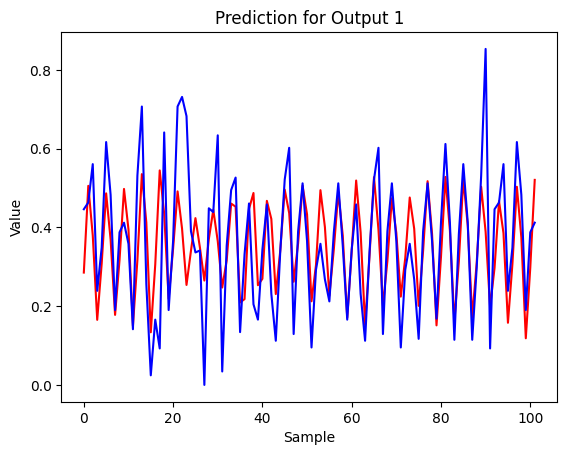

In [25]:
for i in range(1):  # 결과값이 3개인 경우
    plt.figure()
    plt.plot(outputData[:, i], color='red') #빨강 예측
    plt.plot(label_te[:],color='blue') # 파랑 정답
    plt.title(f"Prediction for Output {i+1}")
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.show()

In [26]:
mae_0 =np.mean(np.abs(outputData[:] - label_te[:]))

In [27]:
mae_0

0.17086879269815605

In [28]:
output=model.predict(water_data1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [29]:
water_data_pre=water_data_tr.drop(water_data_tr.index[0:29], axis=0)

In [30]:
water_data_pre

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-06-08 06:00:00,0.412195,0.343902,1.000000,0.286976,1.000000,0.390244,0.333333,0.286976,0.373068,0.695364,...,0.253863,0.196468,0.353659,0.297561,0.343902,0.365854,0.358537,0.341463,0.446341,0.306843
2023-06-08 12:00:00,0.497561,0.458537,0.419426,0.298013,0.419426,0.336585,0.309051,0.298013,0.196468,0.401766,...,0.099338,0.267108,0.495122,0.531707,0.458537,0.095122,0.239024,0.000000,0.463415,0.465784
2023-06-08 18:00:00,0.412195,0.231707,0.384106,0.304636,0.384106,0.341463,0.320088,0.304636,0.121413,0.309051,...,0.264901,0.136865,0.526829,0.853659,0.231707,0.292683,0.531707,0.448780,0.560976,0.545254
2023-06-09 00:00:00,0.092683,0.112195,0.242826,0.061810,0.242826,0.000000,0.075055,0.061810,0.172185,0.099338,...,0.463576,0.333333,0.134146,0.078049,0.112195,0.358537,0.707317,0.439024,0.141463,0.116998
2023-06-09 06:00:00,0.382927,0.339024,0.437086,0.406181,0.437086,0.448780,0.695364,0.406181,0.695364,1.000000,...,0.905077,0.309051,0.331707,0.446341,0.339024,0.268293,0.280488,0.634146,0.348780,0.353201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 18:00:00,0.482927,0.365854,0.373068,0.476821,0.476821,0.268293,0.772627,0.373068,0.320088,0.324503,...,0.150110,0.242826,0.587805,0.526829,0.343902,0.297561,0.353659,0.390244,0.390244,0.348786
2023-08-31 00:00:00,0.190244,0.095122,0.103753,0.121413,0.121413,0.212195,0.083885,0.103753,0.150110,0.128035,...,0.311258,0.070640,0.117073,0.104878,0.458537,0.531707,0.495122,0.512195,0.482927,0.640177
2023-08-31 06:00:00,0.387805,0.292683,0.346578,0.300221,0.300221,0.387805,0.403974,0.346578,0.311258,0.481236,...,0.415011,0.406181,0.390244,0.331707,0.231707,0.853659,0.526829,0.365854,0.341463,0.662252
2023-08-31 12:00:00,0.412195,0.358537,0.507726,0.417219,0.417219,0.512195,0.419426,0.507726,0.415011,0.640177,...,0.209713,0.397351,0.512195,0.460976,0.107317,0.268293,0.134146,0.095122,0.114634,0.618102


In [31]:
water_data_pre[0]=output

In [32]:
water_data_pre

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-06-08 06:00:00,0.224966,0.343902,1.000000,0.286976,1.000000,0.390244,0.333333,0.286976,0.373068,0.695364,...,0.253863,0.196468,0.353659,0.297561,0.343902,0.365854,0.358537,0.341463,0.446341,0.306843
2023-06-08 12:00:00,0.342367,0.458537,0.419426,0.298013,0.419426,0.336585,0.309051,0.298013,0.196468,0.401766,...,0.099338,0.267108,0.495122,0.531707,0.458537,0.095122,0.239024,0.000000,0.463415,0.465784
2023-06-08 18:00:00,0.502404,0.231707,0.384106,0.304636,0.384106,0.341463,0.320088,0.304636,0.121413,0.309051,...,0.264901,0.136865,0.526829,0.853659,0.231707,0.292683,0.531707,0.448780,0.560976,0.545254
2023-06-09 00:00:00,0.421788,0.112195,0.242826,0.061810,0.242826,0.000000,0.075055,0.061810,0.172185,0.099338,...,0.463576,0.333333,0.134146,0.078049,0.112195,0.358537,0.707317,0.439024,0.141463,0.116998
2023-06-09 06:00:00,0.208673,0.339024,0.437086,0.406181,0.437086,0.448780,0.695364,0.406181,0.695364,1.000000,...,0.905077,0.309051,0.331707,0.446341,0.339024,0.268293,0.280488,0.634146,0.348780,0.353201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 18:00:00,0.503461,0.365854,0.373068,0.476821,0.476821,0.268293,0.772627,0.373068,0.320088,0.324503,...,0.150110,0.242826,0.587805,0.526829,0.343902,0.297561,0.353659,0.390244,0.390244,0.348786
2023-08-31 00:00:00,0.374841,0.095122,0.103753,0.121413,0.121413,0.212195,0.083885,0.103753,0.150110,0.128035,...,0.311258,0.070640,0.117073,0.104878,0.458537,0.531707,0.495122,0.512195,0.482927,0.640177
2023-08-31 06:00:00,0.118504,0.292683,0.346578,0.300221,0.300221,0.387805,0.403974,0.346578,0.311258,0.481236,...,0.415011,0.406181,0.390244,0.331707,0.231707,0.853659,0.526829,0.365854,0.341463,0.662252
2023-08-31 12:00:00,0.297368,0.358537,0.507726,0.417219,0.417219,0.512195,0.419426,0.507726,0.415011,0.640177,...,0.209713,0.397351,0.512195,0.460976,0.107317,0.268293,0.134146,0.095122,0.114634,0.618102


In [33]:
water_data_pre_max=water_data_pre*water_max

In [34]:
water_data_pre_max

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-06-08 06:00:00,92.236007,141.0,453.0,130.0,453.0,160.0,151.0,130.0,169.0,315.0,...,115.0,89.0,145.0,122.0,141.0,150.0,147.0,140.0,183.0,139.0
2023-06-08 12:00:00,140.370394,188.0,190.0,135.0,190.0,138.0,140.0,135.0,89.0,182.0,...,45.0,121.0,203.0,218.0,188.0,39.0,98.0,0.0,190.0,211.0
2023-06-08 18:00:00,205.985605,95.0,174.0,138.0,174.0,140.0,145.0,138.0,55.0,140.0,...,120.0,62.0,216.0,350.0,95.0,120.0,218.0,184.0,230.0,247.0
2023-06-09 00:00:00,172.933168,46.0,110.0,28.0,110.0,0.0,34.0,28.0,78.0,45.0,...,210.0,151.0,55.0,32.0,46.0,147.0,290.0,180.0,58.0,53.0
2023-06-09 06:00:00,85.555808,139.0,198.0,184.0,198.0,184.0,315.0,184.0,315.0,453.0,...,410.0,140.0,136.0,183.0,139.0,110.0,115.0,260.0,143.0,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-30 18:00:00,206.418865,150.0,169.0,216.0,216.0,110.0,350.0,169.0,145.0,147.0,...,68.0,110.0,241.0,216.0,141.0,122.0,145.0,160.0,160.0,158.0
2023-08-31 00:00:00,153.684800,39.0,47.0,55.0,55.0,87.0,38.0,47.0,68.0,58.0,...,141.0,32.0,48.0,43.0,188.0,218.0,203.0,210.0,198.0,290.0
2023-08-31 06:00:00,48.586809,120.0,157.0,136.0,136.0,159.0,183.0,157.0,141.0,218.0,...,188.0,184.0,160.0,136.0,95.0,350.0,216.0,150.0,140.0,300.0
2023-08-31 12:00:00,121.921084,147.0,230.0,189.0,189.0,210.0,190.0,230.0,188.0,290.0,...,95.0,180.0,210.0,189.0,44.0,110.0,55.0,39.0,47.0,280.0


In [35]:
water_data_pre_tr=water_data_pre_max.transpose()

In [36]:
water_data_pre_tr.insert(loc=0, column='house', value=water_house)

In [37]:
water_data_pre_tr

,house,2023-06-08 06:00:00,2023-06-08 12:00:00,2023-06-08 18:00:00,2023-06-09 00:00:00,2023-06-09 06:00:00,2023-06-09 12:00:00,2023-06-09 18:00:00,2023-06-10 00:00:00,2023-06-10 06:00:00,...,2023-08-29 12:00:00,2023-08-29 18:00:00,2023-08-30 00:00:00,2023-08-30 06:00:00,2023-08-30 12:00:00,2023-08-30 18:00:00,2023-08-31 00:00:00,2023-08-31 06:00:00,2023-08-31 12:00:00,2023-08-31 18:00:00
0,1호,92.236007,140.370394,205.985605,172.933168,85.555808,137.23908,203.179584,157.42452,64.968902,...,121.934146,191.3984,158.107559,64.742033,125.846483,206.418865,153.6848,48.586809,121.921084,213.587382
1,2호,141.000000,188.000000,95.000000,46.000000,139.000000,214.00000,247.000000,53.00000,160.000000,...,214.000000,247.0000,53.000000,160.000000,210.000000,150.000000,39.0000,120.000000,147.000000,110.000000
2,3호,453.000000,190.000000,174.000000,110.000000,198.000000,89.00000,121.000000,62.00000,151.000000,...,210.000000,150.0000,69.000000,169.000000,251.000000,169.000000,47.0000,157.000000,230.000000,169.000000
3,4호,130.000000,135.000000,138.000000,28.000000,184.000000,150.00000,38.000000,55.00000,130.000000,...,180.000000,260.0000,14.000000,145.000000,203.000000,216.000000,55.0000,136.000000,189.000000,84.000000
4,5호,453.000000,190.000000,174.000000,110.000000,198.000000,89.00000,121.000000,62.00000,151.000000,...,180.000000,260.0000,14.000000,145.000000,203.000000,216.000000,55.0000,136.000000,189.000000,84.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996호,150.000000,39.000000,120.000000,147.000000,110.000000,54.00000,122.000000,218.00000,350.000000,...,47.000000,157.0000,230.000000,169.000000,47.000000,122.000000,218.0000,350.000000,110.000000,183.000000
996,997호,147.000000,98.000000,218.000000,290.000000,115.000000,45.00000,120.000000,210.00000,410.000000,...,0.000000,184.0000,180.000000,260.000000,14.000000,145.000000,203.0000,216.000000,55.000000,136.000000
997,998호,140.000000,0.000000,184.000000,180.000000,260.000000,14.00000,145.000000,203.00000,216.000000,...,46.000000,139.0000,214.000000,247.000000,53.000000,160.000000,210.0000,150.000000,39.000000,120.000000
998,999호,183.000000,190.000000,230.000000,58.000000,143.000000,253.00000,198.000000,48.00000,159.000000,...,78.000000,158.0000,290.000000,300.000000,280.000000,160.000000,198.0000,140.000000,47.000000,184.000000


In [38]:
water_data_pre_tr.to_excel(excel_writer='water_final.xlsx')